In [136]:
import numpy as np
import pandas as pd
import keras

data = pd.read_csv('all_universal_animals_features.txt', sep='\t')
data.index = range(0, len(data))

# shuffle data frame rows (optional)
data = data.sample(frac=1).reset_index(drop=True)
data[:10]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,21.200000,19,0.413838,0.040000,50,8,8,0,0,3,...,NO,0.523810,34.0,0.0,9.0,1.0,-33.1,1.000000,11.0,10.0
1,26.954930,25,0.591125,0.081690,355,3,3,0,0,8,...,NO,0.678571,78.0,10.0,3.0,1.0,-44.1,1.000000,19.0,9.0
2,22.946459,23,0.464437,0.015150,40866,7,7,0,0,7,...,YES,0.869565,61.0,6.0,4.0,1.0,-31.0,1.000000,20.0,3.0
3,19.291971,16,0.480594,0.072993,137,12,12,0,0,8,...,NO,0.578947,52.0,0.0,8.0,2.0,-9.5,1.000000,11.0,8.0
4,26.600000,26,0.509259,0.000000,5,0,0,0,0,1,...,NO,0.481481,65.0,7.0,5.0,1.0,-20.0,1.000000,13.0,14.0
5,22.000000,22,0.318182,NaN,8,0,0,0,0,0,...,NO,0.500000,66.0,0.0,12.0,2.0,-8.1,1.000000,11.0,11.0
6,23.105263,17,0.411624,0.192983,19,7,7,0,0,11,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20.352941,15,0.651936,0.215687,17,4,4,0,0,9,...,NO,0.333333,24.0,0.0,5.0,1.0,-35.5,0.636364,7.0,10.0
8,22.666667,22,0.588274,0.333330,6,0,0,0,0,1,...,YES,0.695652,61.0,5.0,6.0,1.0,-33.9,1.000000,16.0,7.0
9,19.363636,15,0.794733,0.252527,33,11,11,1,0,6,...,NO,0.700000,38.0,0.0,7.0,1.0,-42.2,1.000000,14.0,6.0


#### Inspcet first 10 lines of raw data across all columns (in 3 parts)

In [107]:
# Part-1
data.iloc[:10,:10]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB
0,21.633333,22,0.422747,0.333330,30,3,3,0,3,1
1,18.000000,18,0.555556,NaN,35,0,0,0,0,0
2,18.033557,17,0.496774,0.147650,149,2,2,0,0,6
3,21.060000,21,0.406878,0.013333,50,0,0,0,0,6
4,28.000000,26,0.321429,0.312500,8,5,5,2,4,2
5,21.560000,20,0.470763,0.306667,25,1,1,0,0,6
6,17.000000,17,0.647059,NaN,18,0,0,0,0,0
7,26.461538,22,0.289826,0.743590,13,4,4,0,0,6
8,20.800000,21,0.577273,0.300000,5,1,1,0,0,2
9,26.000000,26,0.307692,NaN,10,0,0,0,0,0


In [108]:
# Part-2
data.iloc[:10,10:23]

,gap_droppin_len,gcs,ats,cpg,cwf,ce,cz,cm2,cm3,ct2,ct3,cl2,cl3
0,0,0.111111,0.166667,0.450000,1.971130,0.984950,0.420000,0.827174,0.648735,0.68750,0.578947,0.75,0.794872
1,0,0.400000,0.250000,0.476190,1.854429,0.952438,0.375000,0.863706,0.625000,0.75000,0.656250,0.80,0.833333
2,3,0.800000,0.750000,1.111111,1.918927,0.746607,0.375000,0.663564,0.604167,0.50000,0.406250,0.60,0.694444
3,1,0.000000,0.384615,0.500000,1.977827,0.945460,0.403846,0.896046,0.690444,0.87500,0.828947,0.90,0.923077
4,0,0.000000,0.368421,0.500000,2.186973,0.903083,0.509434,0.864873,0.680643,0.81250,0.617500,0.85,0.800000
5,4,1.000000,0.454545,0.000000,2.007899,0.720583,0.456522,0.597617,0.511808,0.28125,0.148026,0.45,0.487179
6,0,0.272727,0.000000,0.392857,1.809106,0.950753,0.361702,0.831955,0.628926,0.68750,0.641667,0.75,0.828571
7,0,0.250000,0.000000,0.533333,2.215271,0.925051,0.491228,0.875071,0.727286,0.81250,0.687500,0.85,0.847826
8,0,0.076923,0.400000,0.309524,2.049072,0.966832,0.425926,0.893156,0.716180,0.81250,0.773810,0.85,0.902439
9,0,0.250000,0.777778,0.533333,2.178934,0.766287,0.520000,0.693673,0.627982,0.62500,0.416667,0.70,0.681818


In [109]:
# Part-3
data.iloc[:10,23:]

,ident2rev_compl_clust,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,76,YES,0.904762,60.0,2.0,16.0,1.0,-33.5,1.000000,19.0,2.0
1,75,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79,YES,0.555556,39.0,4.0,3.0,1.0,-19.4,1.000000,10.0,8.0
3,77,YES,0.714286,60.0,7.0,3.0,1.0,-11.0,1.000000,15.0,6.0
4,59,NO,0.666667,61.0,3.0,5.0,1.0,-15.2,1.000000,18.0,9.0
5,69,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,78,NO,0.882353,33.0,0.0,4.0,1.0,-42.6,1.000000,15.0,2.0
7,74,NO,0.428571,61.0,0.0,5.0,2.0,-12.6,0.666667,12.0,10.0
8,71,NO,0.565217,68.0,15.0,8.0,1.0,-22.6,0.722222,13.0,5.0
9,71,NO,0.884615,68.0,0.0,7.0,1.0,-18.2,1.000000,23.0,3.0


#### Replace YES/NO flags with 1/0

In [137]:
label_mapping = {'YES': 1, 'NO': 0}
data = data.replace({'hits_on_mature_miR': label_mapping})
y = data['hits_on_mature_miR']

#### Normalise data

In [138]:
data = (data - data.min()) / (data.max() - data.min())
data[:5]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,0.433333,0.36,0.413838,0.050079,0.000004,0.205128,0.205128,0.0,0.0,0.071429,...,0.0,0.523810,0.297872,0.000000,0.112676,0.000000,0.582071,1.0,0.344828,0.344828
1,0.912911,0.48,0.591125,0.102274,0.000034,0.076923,0.076923,0.0,0.0,0.190476,...,0.0,0.678571,0.765957,0.285714,0.028169,0.000000,0.443182,1.0,0.620690,0.310345
2,0.578872,0.44,0.464437,0.018967,0.003959,0.179487,0.179487,0.0,0.0,0.166667,...,1.0,0.869565,0.585106,0.171429,0.042254,0.000000,0.608586,1.0,0.655172,0.103448
3,0.274331,0.30,0.480594,0.091386,0.000013,0.307692,0.307692,0.0,0.0,0.190476,...,0.0,0.578947,0.489362,0.000000,0.098592,0.111111,0.880051,1.0,0.344828,0.275862
4,0.883333,0.50,0.509259,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.023810,...,0.0,0.481481,0.627660,0.200000,0.056338,0.000000,0.747475,1.0,0.413793,0.482759


#### Impute missing values (with median)

In [139]:
fill_NaN = Imputer(missing_values=np.nan, strategy='median', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(data))
imputed_DF.columns = data.columns
imputed_DF.index = data.index
data = imputed_DF

data[:10]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,hits_on_mature_miR,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched
0,0.433333,0.36,0.413838,0.050079,4.359565e-06,0.205128,0.205128,0.000,0.0,0.071429,...,0.0,0.523810,0.297872,0.000000,0.112676,0.000000,0.582071,1.000000,0.344828,0.344828
1,0.912911,0.48,0.591125,0.102274,3.390773e-05,0.076923,0.076923,0.000,0.0,0.190476,...,0.0,0.678571,0.765957,0.285714,0.028169,0.000000,0.443182,1.000000,0.620690,0.310345
2,0.578872,0.44,0.464437,0.018967,3.958582e-03,0.179487,0.179487,0.000,0.0,0.166667,...,1.0,0.869565,0.585106,0.171429,0.042254,0.000000,0.608586,1.000000,0.655172,0.103448
3,0.274331,0.30,0.480594,0.091386,1.278806e-05,0.307692,0.307692,0.000,0.0,0.190476,...,0.0,0.578947,0.489362,0.000000,0.098592,0.111111,0.880051,1.000000,0.344828,0.275862
4,0.883333,0.50,0.509259,0.000000,0.000000e+00,0.000000,0.000000,0.000,0.0,0.023810,...,0.0,0.481481,0.627660,0.200000,0.056338,0.000000,0.747475,1.000000,0.413793,0.482759
5,0.500000,0.42,0.318182,0.379310,2.906377e-07,0.000000,0.000000,0.000,0.0,0.000000,...,0.0,0.500000,0.638298,0.000000,0.154930,0.111111,0.897727,1.000000,0.344828,0.379310
6,0.592105,0.32,0.411624,0.241610,1.356309e-06,0.179487,0.179487,0.000,0.0,0.261905,...,0.0,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615,0.384615
7,0.362745,0.28,0.651936,0.270034,1.162551e-06,0.102564,0.102564,0.000,0.0,0.214286,...,0.0,0.333333,0.191489,0.000000,0.056338,0.000000,0.551768,0.636364,0.206897,0.344828
8,0.555556,0.42,0.588274,0.417320,9.687922e-08,0.000000,0.000000,0.000,0.0,0.023810,...,1.0,0.695652,0.585106,0.142857,0.070423,0.000000,0.571970,1.000000,0.517241,0.241379
9,0.280303,0.28,0.794733,0.316156,2.712618e-06,0.282051,0.282051,0.125,0.0,0.142857,...,0.0,0.700000,0.340426,0.000000,0.084507,0.000000,0.467172,1.000000,0.448276,0.206897


#### Re-integrate TP label with the original data

In [140]:
y_idx = y[ y == 1]
y_idx

ss = np.random.choice(y_idx.index, int(len(y)/2))
ss
y[ss] = 0

In [141]:
data['TP'] = y
data[:5]

,avg_seq_len,MainBody_length,avg_GC_cont,avg_ATcont_after3p,sum_all_reads,num_gap_bars,scale_rate_5p,num_mismatches_8mer,num_mism_in_MB,len_after_MB,...,bracket_mirna_fraction,hairpin_size_estimate,loop_mirna_distance_estimate,loop_size_estimate,loops_in_hairpin,minimum_free_energy,mirna_bracket_discrepancy,mirna_bracket_majority,mirna_unmatched,TP
0,0.433333,0.36,0.413838,0.050079,0.000004,0.205128,0.205128,0.0,0.0,0.071429,...,0.523810,0.297872,0.000000,0.112676,0.000000,0.582071,1.0,0.344828,0.344828,0
1,0.912911,0.48,0.591125,0.102274,0.000034,0.076923,0.076923,0.0,0.0,0.190476,...,0.678571,0.765957,0.285714,0.028169,0.000000,0.443182,1.0,0.620690,0.310345,0
2,0.578872,0.44,0.464437,0.018967,0.003959,0.179487,0.179487,0.0,0.0,0.166667,...,0.869565,0.585106,0.171429,0.042254,0.000000,0.608586,1.0,0.655172,0.103448,0
3,0.274331,0.30,0.480594,0.091386,0.000013,0.307692,0.307692,0.0,0.0,0.190476,...,0.578947,0.489362,0.000000,0.098592,0.111111,0.880051,1.0,0.344828,0.275862,0
4,0.883333,0.50,0.509259,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.023810,...,0.481481,0.627660,0.200000,0.056338,0.000000,0.747475,1.0,0.413793,0.482759,0


#### Split df into training and test sets

In [142]:
split_ratio = 0.8

sample = np.random.choice(data.index, size=int(len(data)*split_ratio), replace=False)
train_data, test_data = data.iloc[sample], data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))

Number of training samples is 417188
Number of testing samples is 104297


#### Create np.arrays for X_train/test and y_train/test sets

In [143]:
X_train = np.array(train_data.drop('TP', axis=1))
y_train = np.array(keras.utils.to_categorical(train_data['TP'], 2))

X_test = np.array(test_data.drop('TP', axis=1))
y_test = np.array(keras.utils.to_categorical(test_data['TP'], 2))


print("Number of rows in X_train: ", len(X_train))
print("Number of rows in y_train: ", len(y_train))
print("Number of rows in X_test", len(X_test))
print("Number of rows in y_test", len(y_test))

Number of rows in X_train:  417188
Number of rows in y_train:  417188
Number of rows in X_test 104297
Number of rows in y_test 104297


### Train model using optimal parameters <span style='font-size:12px'>(found via GridSearchCV)</span>

In [144]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.optimizers import SGD
from keras.optimizers import RMSprop

from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

# create the model
def create_model(optimizer='adam'):
    
    init_mode = 'he_normal'
    reglr = 0.01
#     optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
    
    # Building the model
    model = Sequential()
    
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(reglr)))
    model.add(Dropout(.4))
    model.add(Dense(32, kernel_initializer=init_mode, activation='relu', kernel_regularizer=regularizers.l2(reglr)))
    model.add(Dropout(.4))

    model.add(Dense(2, activation='softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_model()

#### Fit the model

In [145]:
callbacks = [EarlyStopping(monitor='acc', patience=2)] # do not apply without checking first with no callbacks

out = model.fit(X_train, y_train, epochs=30, batch_size=128, verbose=1, validation_split=0.2, callbacks=callbacks)

Train on 333750 samples, validate on 83438 samples
Epoch 1/30
333750/333750 [==============================] - 5s 16us/step - loss: 0.1733 - acc: 0.9684 - val_loss: 0.1080 - val_acc: 0.9696
Epoch 2/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.1090 - acc: 0.9697 - val_loss: 0.1031 - val_acc: 0.9696
Epoch 3/30
333750/333750 [==============================] - 5s 14us/step - loss: 0.1043 - acc: 0.9697 - val_loss: 0.1002 - val_acc: 0.9696
Epoch 4/30
333750/333750 [==============================] - 5s 15us/step - loss: 0.1013 - acc: 0.9697 - val_loss: 0.0985 - val_acc: 0.9696


In [100]:
# larger model - deprecated
from keras.constraints import maxnorm

if(0):
    model = Sequential()
    model.add(Dense(1000, activation='relu', input_shape=(X_train.shape[1],) ))
    model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(500, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping_monitor = EarlyStopping(patience=2)

    model.fit(X_train, y_train, callbacks=[early_stopping_monitor], validation_split=0.2, batch_size=300)

#### Plot training / validation loss and accuracy change at each epoch

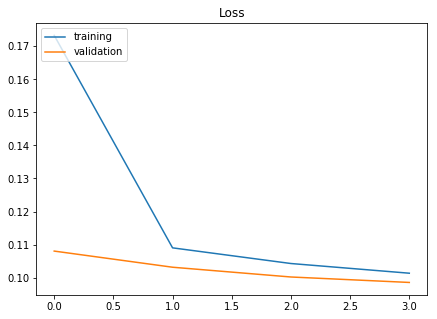

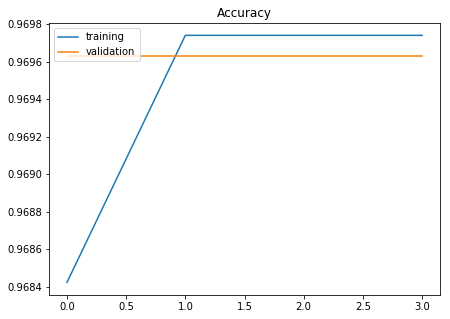

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt

epochs = np.array(out.__dict__['epoch'])
acc = np.array(out.__dict__['history']['acc'])
loss = np.array(out.__dict__['history']['loss'])
val_acc = np.array(out.__dict__['history']['val_acc'])
val_loss = np.array(out.__dict__['history']['val_loss'])

f = plt.figure(figsize=(7,5))
plt.plot(epochs, loss, label='training')
plt.plot(epochs, val_loss, label='validation')
plt.legend(loc='upper left')
plt.title('Loss')

plt.show()

f = plt.figure(figsize=(7,5))
plt.plot(epochs, acc, label='training')
plt.plot(epochs, val_acc, label='validation')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()

f.savefig("train_validation_loss.pdf", bbox_inches='tight')

#### Evaluating the model on the training and testing set

In [147]:
train_score = model.evaluate(X_train, y_train, verbose=1)
print("\n Training Accuracy:", train_score[1])
test_score = model.evaluate(X_test, y_test, verbose=1)
print("\n Testing Accuracy:", test_score[1])

417188/417188 [==============================] - 8s 19us/step

 Training Accuracy: 0.969718687978
104297/104297 [==============================] - 2s 19us/step

 Testing Accuracy: 0.970315541195


#### Get confusion matrix

In [148]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = y.values.argmax

y_pred = model.predict_classes(X_test)

p = model.predict_proba(X_test)

print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test, axis=1), y_pred))
print()
TN, FP, FN, TP = confusion_matrix(np.argmax(y_test, axis=1), y_pred).ravel()
print("TP:", TP)
print("FN:", FN)
print("TN:", TN)
print("FP:", FP)

             precision    recall  f1-score   support

          0       0.97      1.00      0.98    101201
          1       0.00      0.00      0.00      3096

avg / total       0.94      0.97      0.96    104297

[[101201      0]
 [  3096      0]]

TP: 0
FN: 3096
TN: 101201
FP: 0


/Users/dvitsios/anaconda3/envs/py3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Inspect predicted positives

In [104]:
conc = pd.concat([pd.DataFrame(y_test), pd.DataFrame(p)], axis=1)
conc.columns = ['test_0', 'test_1', 'pred_0', 'pred_1']
subdf = conc.loc[conc['test_1'] == 1]
p = subdf.loc[subdf['pred_1'] >= 0.5]

p[:15]
subdf.loc[subdf['pred_1'] >= 0.5]

,test_0,test_1,pred_0,pred_1
10,0.0,1.0,0.000181,0.999819
14,0.0,1.0,0.000191,0.999809
20,0.0,1.0,0.000218,0.999782
25,0.0,1.0,0.000246,0.999754
27,0.0,1.0,0.000307,0.999693
32,0.0,1.0,0.000202,0.999798
38,0.0,1.0,0.000286,0.999714
41,0.0,1.0,0.000269,0.999731
45,0.0,1.0,0.000198,0.999802
53,0.0,1.0,0.000205,0.999795
